these are libraries for plotting and pandas for the used dataframe

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Loading In data Through OCBC driver for SQL server
I retrieved the connection string from the azure and used the pyodbc library to make a connection.

I use an SQL statement (cursor exectute query with the query saying retrieve everyting from dbo)

In [9]:
import pyodbc
import os
from dotenv import load_dotenv

# Load environment variables from a .env file
load_dotenv()

# Get the connection string from the environment variables
connection_string = os.getenv('CONNECTION_STRING')

# Establish the connection
conn = pyodbc.connect(connection_string)

# Create a cursor object
cursor = conn.cursor()

# Execute a query
# query = 'SELECT TOP (100) * FROM [SalesLT].[ProductModel]'
query = 'SELECT * FROM [dbo].[ds_salaries]'
cursor.execute(query)

# Fetch the data into a list of tuples
rows = cursor.fetchall()

# Get column names
columns = [column[0] for column in cursor.description]

# Close the connection
conn.close()

# Create a DataFrame from the fetched data
df = pd.DataFrame.from_records(rows, columns=columns)

Info shows the number of non-null values for each field; you can see that none of the fields have null values since they all have the same number of (3755). This is the total the number of records in the datasets

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   object
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   object
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   object
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   object
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: object(11)
memory usage: 322.8+ KB


the types are objects so I the type of integer numbers to later be able to use it in the functions


In [11]:
df = df.astype({'work_year': int, 'salary': int,'salary_in_usd': int,'remote_ratio': int})

checking now if it indeed changed and it changed :)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


df.head shows the first ten rows of the DataFrame.

In [13]:
df.head(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
5,2023,SE,FT,Applied Scientist,222200,USD,222200,US,0,US,L
6,2023,SE,FT,Applied Scientist,136000,USD,136000,US,0,US,L
7,2023,SE,FT,Data Scientist,219000,USD,219000,CA,0,CA,M
8,2023,SE,FT,Data Scientist,141000,USD,141000,CA,0,CA,M
9,2023,SE,FT,Data Scientist,147100,USD,147100,US,0,US,M


This number are similar to boxplot and shows the mean per category, it says how much tracks in counted and the standard deviation

So the average salary in usd for example is 137 570 with a standard deviation of 63 055. The lowest value found is 5132. This is quite low so for the data quality we can look at the distrubtion of all the salaries

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
work_year,3755.0,2022.373635,0.691448,2020.0,2022.0,2022.0,2023.0,2023.0
salary,3755.0,190695.571771,671676.500508,6000.0,100000.0,138000.0,180000.0,30400000.0
salary_in_usd,3755.0,137570.389880,63055.625278,5132.0,95000.0,135000.0,175000.0,450000.0
remote_ratio,3755.0,46.271638,48.589050,0.0,0.0,0.0,100.0,100.0


So now I made a histogram to see the distrubition and it makes sense I think but idk actually hahah

<Axes: >

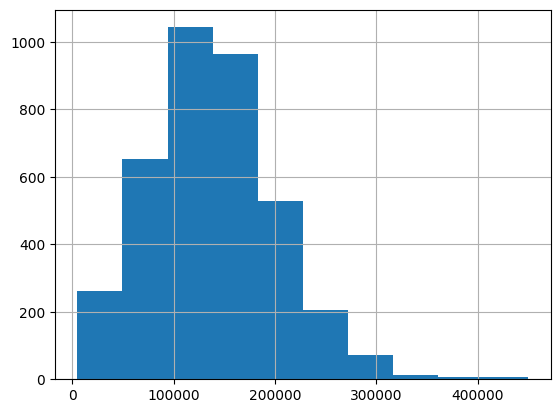

In [15]:
df.salary_in_usd.hist()

# Distribution

In [45]:
percentage = round((df[['work_year','salary']].groupby(['work_year']).count()/df.count()[0])*100,2).reset_index()
percentage.rename(columns={'salary':'distribution'}, inplace=True)
percentage['distribution'] = percentage['distribution'].astype(str) + '%'
percentage

C:\Users\Tanja\AppData\Local\Temp\ipykernel_21292\4134868291.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  percentage = round((df[['work_year','salary']].groupby(['work_year']).count()/df.count()[0])*100,2).reset_index()


,work_year,distribution
0,2020,2.9%
1,2021,8.82%
2,2022,43.54%
3,2023,44.74%


# Data Quality

Again we can see that there are no null values and there are a couple of duplicated values

In [16]:
print('duplicated:  %d'%df.duplicated().sum()) 
print('null values: %d'%df.isna().sum().sum())

print('percentage of duplicated values:  ', round(df.duplicated().sum()/df.shape[0]*100,2), '%') 

duplicated:  1171
null values: 0
percentage of duplicated values:   31.19 %


dropping duplicates

In [17]:
df= df.drop_duplicates()
print('duplicated:  %d'%df.duplicated().sum())

duplicated:  0


now we want to see the top 10 earning jobs. However when you show them below you can in the count column see that for the top 10 earning jobs there is not a lot of datapoints (only 1 or 2 counts). What I did was remove this ones, but you can argue that instead of dropping these we can see if similar titles appears in the data to get more data (which in this case might be  a more appriopiate fit since we have a small dataset)

In [18]:
df.groupby(['job_title']).agg({'salary_in_usd': ['mean','std','count']}).reset_index().sort_values(by=('salary_in_usd','mean'), ascending=False).head(10)

job_title  salary_in_usd                     
                                                  mean            std count
46               Data Science Tech Lead  375000.000000            NaN     1
19                 Cloud Data Architect  250000.000000            NaN     1
35                            Data Lead  212500.000000   17677.669530     2
28                  Data Analytics Lead  211254.500000  273997.513749     2
84             Principal Data Scientist  198171.125000   99306.052833     8
53             Director of Data Science  195140.727273   90014.326191    11
83              Principal Data Engineer  192500.000000   10606.601718     2
75   Machine Learning Software Engineer  192420.000000   99504.213199    10
8                     Applied Scientist  190342.580645   57156.245807    31
85  Principal Machine Learning Engineer  190000.000000            NaN     1

In [19]:
# Count the occurrences of each job title
job_title_counts = df['job_title'].value_counts()

# Filter out job titles that occur only once
df_filtered = df[df['job_title'].isin(job_title_counts[job_title_counts > 4].index)]

So here i removed job titles that only have 2 or less records

In [20]:
df_filtered.groupby(['job_title']).agg({'salary_in_usd': ['mean','std','count']}).reset_index().sort_values(by=('salary_in_usd','mean'), ascending=False).head(10)

job_title  salary_in_usd                    
                                                 mean           std count
45            Principal Data Scientist  198171.125000  99306.052833     8
30            Director of Data Science  195140.727273  90014.326191    11
43  Machine Learning Software Engineer  192420.000000  99504.213199    10
5                    Applied Scientist  190342.580645  57156.245807    31
32                        Head of Data  183857.500000  92002.651359    10
26                Data Science Manager  181930.173077  59175.832887    52
19        Data Infrastructure Engineer  175051.666667  19230.393045     6
17                      Data Architect  167751.453125  59798.545770    64
47                   Research Engineer  165909.393939  57411.534396    33
42          Machine Learning Scientist  163220.076923  65101.892078    26

In [21]:
grouped_analysis = df_filtered.groupby(['job_title']).agg({'salary_in_usd': 'mean'}).reset_index().sort_values(by='salary_in_usd', ascending=False).head(10)
grouped_analysis_outliers = df.groupby(['job_title']).agg({'salary_in_usd': 'mean'}).reset_index().sort_values(by='salary_in_usd', ascending=False).head(10)
display(grouped_analysis)

,job_title,salary_in_usd
45,Principal Data Scientist,198171.125000
30,Director of Data Science,195140.727273
43,Machine Learning Software Engineer,192420.000000
5,Applied Scientist,190342.580645
32,Head of Data,183857.500000
26,Data Science Manager,181930.173077
19,Data Infrastructure Engineer,175051.666667
17,Data Architect,167751.453125
47,Research Engineer,165909.393939
42,Machine Learning Scientist,163220.076923


In [22]:
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2584 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           2584 non-null   int64 
 1   experience_level    2584 non-null   object
 2   employment_type     2584 non-null   object
 3   job_title           2584 non-null   object
 4   salary              2584 non-null   int64 
 5   salary_currency     2584 non-null   object
 6   salary_in_usd       2584 non-null   int64 
 7   employee_residence  2584 non-null   object
 8   remote_ratio        2584 non-null   int64 
 9   company_location    2584 non-null   object
 10  company_size        2584 non-null   object
dtypes: int64(4), object(7)
memory usage: 242.2+ KB


C:\Users\Tanja\AppData\Local\Temp\ipykernel_21292\2782164311.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped_analysis, x='salary_in_usd', y='job_title', palette='pastel')


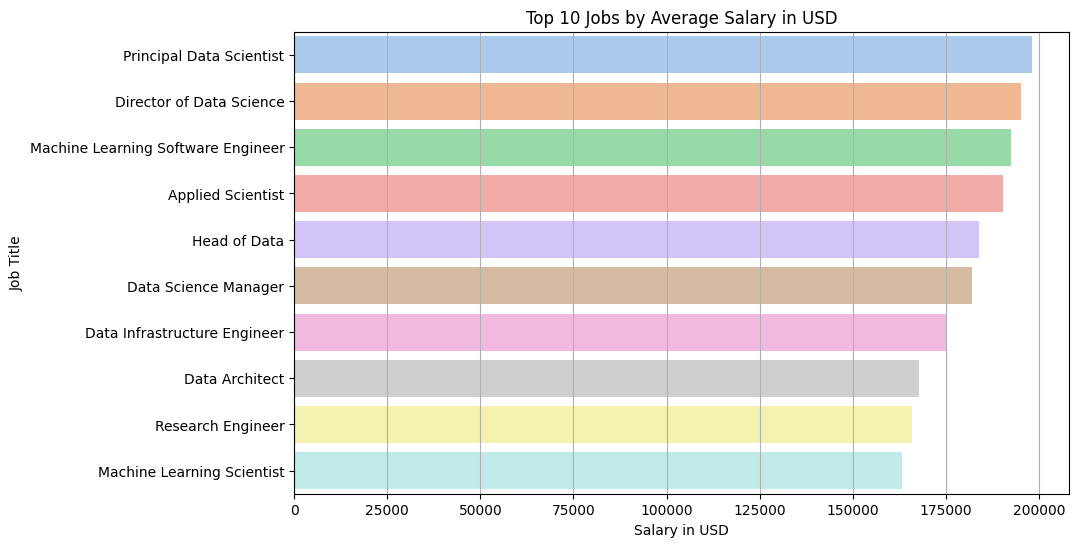

In [25]:
plt.figure(figsize=(10, 6))
sns.barplot(data=grouped_analysis, x='salary_in_usd', y='job_title', palette='pastel')
plt.title('Top 10 Jobs by Average Salary in USD')
plt.xlabel('Salary in USD')
plt.ylabel('Job Title')
plt.grid(axis='x')
plt.show()

without filtering the graph would've been the one below ; we can see that data science tech lead is super high but it had only 1 data point so not really reliable

C:\Users\Tanja\AppData\Local\Temp\ipykernel_21292\2021641224.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped_analysis_outliers, x='salary_in_usd', y='job_title', palette='pastel')


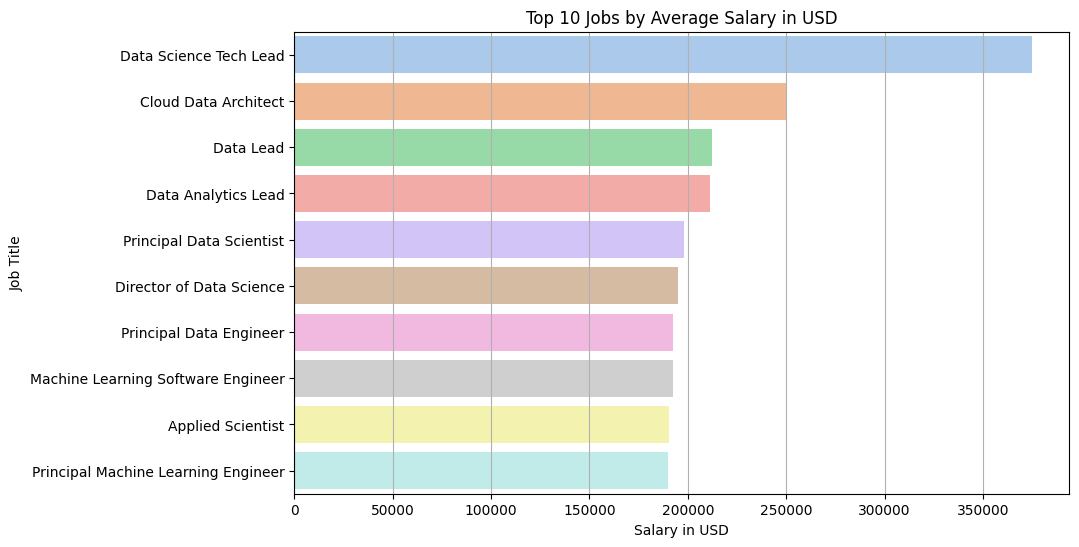

In [26]:
plt.figure(figsize=(10, 6))
sns.barplot(data=grouped_analysis_outliers, x='salary_in_usd', y='job_title', palette='pastel')
plt.title('Top 10 Jobs by Average Salary in USD')
plt.xlabel('Salary in USD')
plt.ylabel('Job Title')
plt.grid(axis='x')
plt.show()

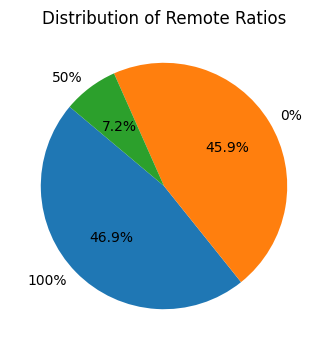

In [28]:
# Calculate the percentage of each remote_ratio category
remote_ratio_counts = df['remote_ratio'].value_counts()
remote_ratio_percentages = remote_ratio_counts / remote_ratio_counts.sum() * 100
labels1 = ["100%","0%","50%"]
# Plot the pie chart
plt.figure(figsize=(4, 4))
plt.pie(remote_ratio_percentages, labels=labels1, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Remote Ratios')
plt.show()